# Import necessary

In [1]:
# Import libraries
# Ignore warnings
import numpy as np
from scipy.stats import norm
import numpy as np
import astropy
import astropy_healpix
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
import healpy as hp
import pandas as pd
import math
import scipy
import statistics as st
from scipy import stats
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from IPython.display import Image

%matplotlib inline

NSIDE=2048
Npix=12*NSIDE**2

pi=math.pi

import warnings
warnings.filterwarnings('ignore')

# Read in data

In [2]:
# Read in AMF catalog
dr9 = pd.read_csv('Data/dr9_main_complete.csv', header=-1)
dr9.columns = ['amf_no','amf_ra','amf_dec','amf_z','amf_lk','amf_rh','amf_r200','amf_rc','amf_c','amf_str_rh','bax_id','mcxc_id','red_id','whl_id']
dr9.head()

,amf_no,amf_ra,amf_dec,amf_z,amf_lk,amf_rh,amf_r200,amf_rc,amf_c,amf_str_rh,bax_id,mcxc_id,red_id,whl_id
0,4,23.9128,20.7465,0.0601,176.9125,219.3663,1.946,0.925,2.104,73.0001,-9999,-9999,-9999,-9999
1,5,260.6324,32.1398,0.2252,222.1219,200.7117,1.784,0.625,2.856,35.0001,ABELL2261,J1722.4+3208,RMJ172227.2+320757.2,J172227.2+320757
2,6,197.8796,-1.3356,0.2042,171.6872,192.0829,1.773,0.227,7.792,9.0001,ABELL1689,J1311.5-0120,RMJ131129.5-012028.0,J131129.5-012028
3,7,250.1485,46.6917,0.2248,225.9874,182.3373,1.725,0.495,3.483,36.0001,ABELL2219,J1640.3+4642,RMJ164019.8+464241.5,J164019.8+464242
4,8,346.3402,21.0378,0.1453,121.0124,182.2769,1.775,0.440,4.034,72.0001,-9999,-9999,RMJ230520.1+210313.5,J230520.1+210313


In [3]:
# Read in Burenin catalog
bur = pd.read_csv('Data/planck_extended_burenin.csv')
#bur.head()
bur.shape
bur.sort_values(by=['bur_sn']).head()

,bur_no,bur_dec,bur_ra,bur_z,bur_sn
1968,1969,8.8492,219.9250,0.2562,4.5
912,913,29.4583,153.3792,0.5739,4.5
2496,2497,36.8178,260.2167,0.4630,4.5
107,108,0.8461,8.6333,0.1919,4.5
1826,1827,3.8847,210.7625,0.4662,4.5


In [4]:
# Read in Redmapper cat1alog
red = pd.read_csv("Data/redmapper_v6.3_errs.csv",header=-1)
red.columns = ['red_no','red_ra','red_dec','red_z','red_zerr','red_rh','red_rherr']
red.head()

,red_no,red_ra,red_dec,red_z,red_zerr,red_rh,red_rherr
0,1,239.5833,27.2334,0.0948,0.0046,169.8378,4.1870
1,2,250.0825,46.7115,0.2328,0.0062,199.5393,5.2998
2,3,197.8730,-1.3411,0.1824,0.0039,164.7122,4.2416
3,5,137.3007,10.9736,0.1705,0.0036,174.7042,4.9479
4,6,203.8337,41.0011,0.2317,0.0061,189.1812,5.6134


In [5]:
# Read in WHL catalog
whl = pd.read_fwf('Data/whl2_v2.dat')
whl.columns = ['whl_no','whl_id','RA','dec','z','rich']
whl.head()

,whl_no,whl_id,RA,dec,z,rich
0,2,J000002.3+051718,0.0096,5.2883,0.1696,17.48
1,3,J000003.3+311354,0.0138,31.2318,0.5428,14.27
2,4,J000003.5+314708,0.0147,31.7856,0.0932,16.97
3,5,J000004.7+022826,0.0194,2.4739,0.4179,13.71
4,6,J000004.9-033248,0.0202,-3.5468,0.5968,19.19


In [6]:
# Read in Planck catalog
plsz2 = pd.read_csv('Data/planck_sz2.csv',header=-1)
plsz2.columns = ['pl_no','pl_name','pl_glon','pl_glat','pl_ra','pl_dec','pl_poserr','pl_sn',\
                   'pl_pipe','pl_pipedet','pl_pccs2','pl_psz','pl_irflag','pl_qneural','pl_y5r500',\
                   'pl_y5r500err','pl_valid','pl_zid','pl_z','pl_msz','pl_mszerrup','pl_mszerrlow',\
                   'pl_mcxc','pl_red','pl_act','pl_spt','pl_wise','pl_ami','pl_cosmo','pl_comment']
plsz2.sort_values(by=['pl_sn'], ascending = True).head()

,pl_no,pl_name,pl_glon,pl_glat,pl_ra,pl_dec,pl_poserr,pl_sn,pl_pipe,pl_pipedet,...,pl_mszerrup,pl_mszerrlow,pl_mcxc,pl_red,pl_act,pl_spt,pl_wise,pl_ami,pl_cosmo,pl_comment
962,963,PSZ2 G213.30+50.99,213.305483,50.991205,150.629704,20.528271,2.695308,4.500935,2,10,...,0.611051,0.625637,NaN,NaN,NaN,NaN,3,2.100028,False,NaN
647,648,PSZ2 G131.27-25.82,131.275976,-25.820624,22.204940,36.444726,3.307009,4.502190,2,10,...,0.000000,0.000000,NaN,NaN,NaN,NaN,-3,-1000.000000,False,NaN
469,470,PSZ2 G099.24+42.54,99.249141,42.543305,238.037819,65.340540,2.428019,4.502672,1,100,...,0.382507,0.390415,NaN,NaN,NaN,NaN,-10,-1000.000000,False,NaN
1445,1446,PSZ2 G306.22-53.56,306.222358,-53.566815,8.485818,-63.449523,2.428903,4.503147,1,100,...,0.693647,0.773563,NaN,NaN,NaN,SPT-CLJ0033-6326,-3,-1000.000000,False,NaN
1502,1503,PSZ2 G318.54-07.62,318.541624,-7.629812,232.924314,-65.521357,2.428006,4.503768,1,100,...,0.000000,0.000000,NaN,NaN,NaN,NaN,-2,-1000.000000,False,NaN


In [7]:
# Read in ymaps, stddevs (in Galactic coordinates)
nilc_ymap = hp.read_map('Data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits')
nilc_stddevmap = hp.read_map('Data/COM_CompMap_Compton-SZMap-nilc-stddev_2048_R2.00.fits')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


# Import Catalogs

In [8]:
# Convert the RA and DEC to galactic coordinates
c = SkyCoord(dr9['amf_ra'],dr9['amf_dec'],frame='icrs',unit='deg')

dr9['glat'] = c.galactic.b.degree
dr9['glon'] = c.galactic.l.degree

c=SkyCoord(bur['bur_ra'],bur['bur_dec'],frame='icrs',unit='deg')

bur['glat'] = c.galactic.b.degree # Galactic Latitude
bur['glon'] = c.galactic.l.degree # Galactic Longitude

# Create masked map

Found Burenin filter (https://healpix.jpl.nasa.gov/html/subroutinesnode48.htm) but it's in fucking fortran

In [9]:
# Smooth noise map by 1 degree
# The essential difference between Burenin and this, is that he uses
# a 1 degree radius median filter for smoothing (not available on healpy)
stddev_smoothed = hp.smoothing(nilc_stddevmap,fwhm=np.radians(2.))

Sigma is 50.959308 arcmin (0.014823 rad) 
-> fwhm is 120.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [10]:
# Calculate signal over noise (smoothed)
sn_smoothed_n = nilc_ymap/stddev_smoothed

# Smooth the sn_smoothed_n map by 1 degree
sn_smoothed_n_smoothed = hp.smoothing(sn_smoothed_n,fwhm=np.radians(1.))

# Subtract the smoothed signal to noise map from the signal to noise map
sn_result = sn_smoothed_n - sn_smoothed_n_smoothed

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [11]:
# Mask the sn_result array
# By convention the mask is 0 where the data is masked, while numpy defines data masked when 
# the mask is true, so it is necessary to flip the mask.
mask = hp.read_map('Data/maskplanckfullsz61.fits')
sn_masked = hp.ma(sn_result,badval=+1.6375e+30)
sn_masked2 = hp.ma(sn_result)
sn_masked2.mask = np.logical_not(mask)
sn_masked.mask = np.logical_not(mask)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [12]:
scipy.stats.describe(mask)

DescribeResult(nobs=50331648, minmax=(0.0, 1.0), mean=0.6119134624799093, variance=0.23747538163398552, skewness=-0.4593069694500196, kurtosis=-1.7890371078147336)

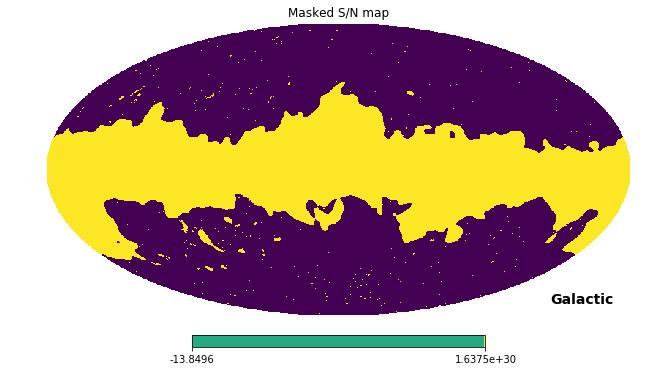

In [13]:
# Plot the masked array
hp.mollview(sn_masked,norm='hist',coord=['G'],title='Masked S/N map')

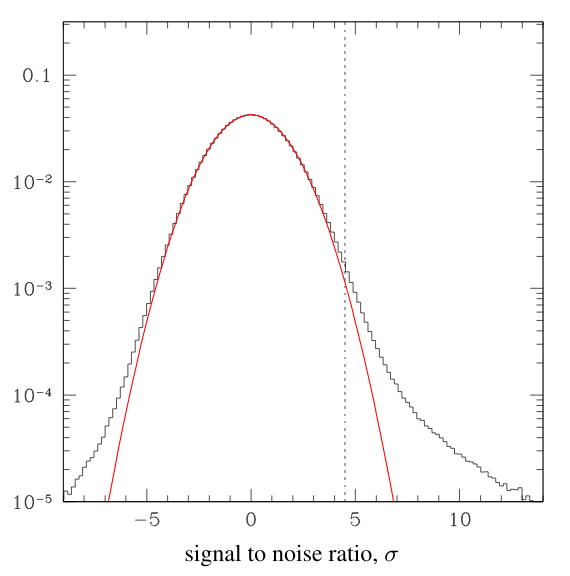

In [14]:
Image(filename='Papers/burfig.png') 

---------------------------------

----------------------

-------------------------

# Burenin Plot

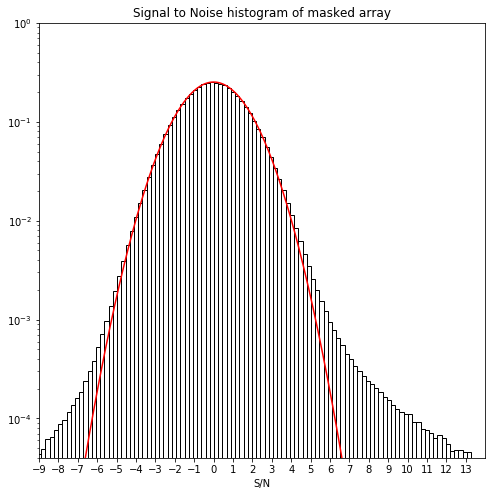

In [15]:
# Histogram of the above map
plt.figure(figsize=(8,8))
plt.hist(sn_masked.compressed(), bins=500,normed=True,fill=False,edgecolor='k');
plt.xlim((-9,14))
plt.ylim((4e-5,1))
plt.yscale('log');
plt.xticks(np.arange(-9, 14, 1.0))
plt.xlabel('S/N');
plt.title('Signal to Noise histogram of masked array')

ln = np.linspace(-9, 14, len(sn_masked))
g = stats.norm.pdf(ln, 0, 1.58)  
plt.plot(ln, g, label="Norm", color="red")

plt.show()

In [16]:
scipy.stats.describe(sn_masked)

DescribeResult(nobs=50331648, minmax=(-1473.5981054323968, 1650.3349078145095), mean=-6.636043488053242e-09, variance=10.11485622718682, skewness=-4.217014382600839, kurtosis=13500.95089301354)

In [17]:
scipy.stats.describe(sn_masked2)

DescribeResult(nobs=50331648, minmax=(-1473.5981054323968, 1650.3349078145095), mean=-6.636043488053242e-09, variance=10.11485622718682, skewness=-4.217014382600839, kurtosis=13500.95089301354)

--------------------------

---------------------------------------------------

-------------------------------------------

# Locate unclassified AMF clusters

#### Round AMF glon and glat because the AMF clusters and Burenin clusters are off just slightly from each other

In [18]:
d_glonR = []
d_glatR = []
d_glon = []
d_glat = []
d_raR = []
d_decR = []
d_rh = []
d_sn = []
i = 0

for i in range(dr9.shape[0]):
        d_raR.append("%.1f" % dr9.iloc[i,1])
        d_decR.append("%.1f" % dr9.iloc[i,2])
        d_glon.append(dr9.iloc[i,15])
        d_glat.append(dr9.iloc[i,14])
        d_glonR.append("%.1f" % dr9.iloc[i,15])
        d_glatR.append("%.1f" % dr9.iloc[i,14])
        d_pix = hp.ang2pix(2048,dr9.iloc[i,15],dr9.iloc[i,14],lonlat=True)
        d_rh.append(dr9.iloc[i,5])
        d_sn.append(sn_masked[d_pix])

tup1 = zip(d_glon, d_glat)

amf_round = pd.DataFrame({'Glon': d_glonR, 'Glat': d_glatR, 'RA': d_raR, 'dec': d_decR})

In [19]:
amf_round.head()

,Glon,Glat,RA,dec
0,136.7,-40.9,23.9,20.7
1,55.6,31.8,260.6,32.1
2,313.4,61.1,197.9,-1.3
3,72.6,41.4,250.1,46.7
4,92.2,-35.4,346.3,21.0


#### Round Burenin for similar reasons

In [20]:
b_glon = []
b_glat = []
b_rh = []
i = 0

for i in range(bur.shape[0]):
        b_glon.append("%.1f" % bur.iloc[i,6])
        b_glat.append("%.1f" % bur.iloc[i,5])

tup2 = zip(b_glon, b_glat)

bur_round = pd.DataFrame({'Glon': b_glon, 'Glat': b_glat})
bur_round.shape

(2964, 2)

In [21]:
r_ra = []
r_dec = []
r_rh = []
i = 0

for i in range(red.shape[0]):
        r_ra.append("%.1f" % red.iloc[i,1])
        r_dec.append("%.1f" % red.iloc[i,2])

tup3 = zip(r_ra, r_dec)

red_round = pd.DataFrame({'RA': r_ra, 'Dec': r_dec})
red_round.head()

,RA,Dec
0,239.6,27.2
1,250.1,46.7
2,197.9,-1.3
3,137.3,11.0
4,203.8,41.0


#### Pull out clusters from DR9 with high SNs

In [162]:
num = []
highglon = []
highglat = []
indx = []

for j in range(dr9.shape[0]):
    pix = hp.ang2pix(2048,dr9.iloc[j,15],dr9.iloc[j,14],lonlat=True,nest=False)
    if (sn_masked[pix] < 5):
        highglon.append("%.1f" % dr9.iloc[j,15])
        highglat.append("%.1f" % dr9.iloc[j,14])
        num.append(dr9.iloc[j,0])
        indx.append(j)

tup3 = zip(highglon, highglat)

amf_high = pd.DataFrame({'Glon': highglon, 'Glat': highglat})

#### Find AMF unique clusters via subtracting rounded Burenin from AMF

In [163]:
amfset = set(list(zip(d_glonR, d_glatR)))
burset = set(list(zip(b_glon, b_glat)))
redset = set(list(zip(r_ra, r_dec)))
amfset2 = set(list(zip(d_raR, d_decR)))

amfNOTred = amfset2-redset
amfINred = amfset2-amfNOTred
amfNOTbur = amfset-burset
aNOTb_lon,aNOTb_lat, = zip(*amfNOTbur)
len(amfINred)

12846

In [164]:
unique = pd.DataFrame({'Glon': aNOTb_lon, 'Glat': aNOTb_lat})
unique.head()

,Glon,Glat
0,46.2,-35.2
1,84.5,-23.9
2,135.6,-57.3
3,90.7,-60.0
4,184.1,-43.2


#### Generate counts for clusters identified and unidentified by Burenin

Converted the AMF and Burenin catalogs to sets of tuples (glon,glat)

Subtracted Burenin from AMF to get the AMF-unique clusters

May have lost some precision by rounding the glon and glat to one dec but by using *both* glon and glat I'm hoping that there won't be any errors in subtraction.

In [165]:
highamf = set(list(zip(highglon, highglat)))
highamfNOTbur = highamf-burset
highamfINbur = highamf-highamfNOTbur

i,j = zip(*highamfINbur)
k,l = zip(*highamfNOTbur)
m,n = zip(*highamf)

highinbur = pd.DataFrame({'Glon': i, 'Glat': j})
highnotinbur = pd.DataFrame({'Glon': k, 'Glat': l})
hightotal = pd.DataFrame({'Glon': m, 'Glat': n})

print(highinbur.shape[0])
print(highnotinbur.shape[0])
print(len(highamf))

256
42796
43052


#### Create list of cluster numbers

In [ ]:
%%time

clusts = []
RA = []
dec = []
lat = []
lon = []
sn = []
z = []
rich = []
burn = []
noi = []
sig = []
red = []
whl = []
i = 0;
j = 0;
k = 0;
l = 0;

for i in range(highinbur.shape[0]):
    for j in range(dr9.shape[0]):
        if(highinbur.iloc[i,0] == "%.1f" % dr9.iloc[j,15]) and (highinbur.iloc[i,1] == "%.1f" % dr9.iloc[j,14]):
            pix = hp.ang2pix(2048,dr9.iloc[j,15],dr9.iloc[j,14],lonlat=True)
            
            sig.append(nilc_stddevmap[pix]*sn_masked[pix])
            noi.append(nilc_stddevmap[pix])
            clusts.append(dr9.iloc[j,0])
            RA.append(dr9.iloc[j,1])
            dec.append(dr9.iloc[j,2])
            lat.append(dr9.iloc[j,14])
            lon.append(dr9.iloc[j,15])
            sn.append(sn_masked[pix])
            z.append(dr9.iloc[j,3])
            rich.append(dr9.iloc[j,5])
            red.append(dr9.iloc[j,12])
            whl.append(dr9.iloc[j,13])
            burn.append(1)

for k in range(highnotinbur.shape[0]):
    for l in range(dr9.shape[0]):
        if(highnotinbur.iloc[k,0] == "%.1f" % dr9.iloc[l,15]) and (highnotinbur.iloc[k,1] == "%.1f" % dr9.iloc[l,14]):
            pix = hp.ang2pix(2048,dr9.iloc[l,15],dr9.iloc[l,14],lonlat=True)

            sig.append(nilc_stddevmap[pix]*sn_masked[pix])
            noi.append(nilc_stddevmap[pix])
            clusts.append(dr9.iloc[l,0])
            RA.append(dr9.iloc[l,1])
            dec.append(dr9.iloc[l,2])
            lat.append(dr9.iloc[l,14])
            lon.append(dr9.iloc[l,15])
            sn.append(sn_masked[pix])
            z.append(dr9.iloc[l,3])
            rich.append(dr9.iloc[l,5])
            red.append(dr9.iloc[l,12])
            whl.append(dr9.iloc[l,13])
            burn.append(0)        

highfinal = pd.DataFrame({'no': clusts, 'ra': RA, 'dec': dec, 'glat': lat, 'glon': lon, 'sn': sn, 'z': z, 'rh': rich, 'noi': noi, 'sig': sig, 'bur': burn, 'whl': whl, 'red': red})

In [ ]:
highfinal1 = highfinal[(highfinal.rh > 0) & (highfinal.noi > 8.933140773374012e-07) & (highfinal.sn >0)].sort_values(by=['sn'], ascending = True)

In [ ]:
highfinal1.head()

In [ ]:
highfinal1.to_csv('objects.csv')

In [ ]:
highfinal1.shape

In [ ]:
i = 0
count = 0
for i in range(highfinal1.shape[0]):
    if (highfinal1.iloc[i, 10] == 1 and highfinal1.iloc[i, 11] != '-9999' and highfinal1.iloc[i, 12] != '-9999'):
        count = count+1
count

#### Determine low noise values and cut them out of unique clusters

In [ ]:
np.mean(highfinal1.noi)

In [ ]:
hfnoi = highfinal1.noi
hfsig = highfinal1.sig

noise = []
sig = []

for i in range(hfnoi.shape[0]):
    noise.append(hfnoi.iloc[i])
    
for j in range(hfsig.shape[0]):
    sig.append(hfsig.iloc[j])
    
plt.hist(noise,bins=100,normed=True,fill=False,alpha=.6)

In [ ]:
len(hfnoi)

#### Create scatter of SN per richness

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(np.log10(highfinal['rh']),highfinal['sn'],c=highfinal.z,alpha=.6);
plt.colorbar()

----------------------------------

--------------------

--------------------------

# Plots of full AMF

In [ ]:
amf_all = pd.DataFrame({'Glon': d_glon, 'Glat': d_glat, 'Rh': d_rh, 'SN': d_sn})

In [ ]:
amfall_sns = []

for i in range(amf_all.shape[0]):
    if amf_all.iloc[i,3]:
        amfall_sns.append(amf_all.iloc[i,3])
    else:
        amfall_sns.append(0)
        
# sns

In [ ]:
# Histogram of the above map
plt.hist(amfall_sns,bins=492,normed=True,fill=False,edgecolor='blue',alpha=.6);
plt.xlim((-9,14))
plt.ylim(1e-4,)
plt.yscale('log');
plt.xlabel('S/N');
# plt.title('Signal to Noise histogram of AMF-unique clusters');

# ln = np.linspace(-9, 14, len(sns))
# g = stats.norm.pdf(ln, 0, 1.73)  
# plt.plot(ln, g, label="Norm", color="red")

plt.show()

-----------------------------------

-----------------------------------

-----------------------------------

# Plot AMF and compare plots to Burenin

In [ ]:
d_glonR1 = []
d_glatR1 = []
d_glon1 = []
d_glat1 = []
d_rh1 = []

for i in range(dr9.shape[0]):
        d_glon1.append(dr9.iloc[i,15])
        d_glat1.append(dr9.iloc[i,14])
        d_glonR1.append("%.1f" % dr9.iloc[i,15])
        d_glatR1.append("%.1f" % dr9.iloc[i,14])

tup1 = zip(d_glon1, d_glat1)
  
df11 = pd.DataFrame({'Glon': d_glon1, 'Glat': d_glat1})
df21 = pd.DataFrame({'Glon': d_glonR1, 'Glat': d_glatR1})

b_glon1 = []
b_glat1 = []
b_rh1 = []

for i in range(bur.shape[0]):
        b_glon1.append("%.1f" % bur.iloc[i,6])
        b_glat1.append("%.1f" % bur.iloc[i,5])

tup2 = zip(b_glon1, b_glat1)

df31 = pd.DataFrame({'Glon': b_glon1, 'Glat': b_glat1})

amfset1 = set(list(zip(d_glonR1, d_glatR1)))
burset1 = set(list(zip(b_glon1, b_glat1)))
amfNOTbur1 = amfset1-burset1
aNOTb_lon1,aNOTb_lat1, = zip(*amfNOTbur1)
len(amfNOTbur1)

new1 = pd.DataFrame({'Glon': aNOTb_lon1, 'Glat': aNOTb_lat1})
new1.head()

In [ ]:
amfunique_sns = []

for i in range(new1.shape[0]):
    pix = hp.ang2pix(2048,float(new1.iloc[i,0]),float(new1.iloc[i,1]),lonlat=True)
    if sn_masked[pix]:
        amfunique_sns.append(sn_masked[pix])
    else:
        amfunique_sns.append(0)
        
# sns

In [ ]:
# Histogram of the above map
plt.hist(amfunique_sns,bins=492,normed=True,fill=False,edgecolor='blue',alpha=.6);
plt.xlim((-9,14))
plt.ylim(1e-4,)
plt.yscale('log');
plt.xlabel('S/N');
# plt.title('Signal to Noise histogram of AMF-unique clusters');

# ln = np.linspace(-9, 14, len(sns))
# g = stats.norm.pdf(ln, 0, 1.73)  
# plt.plot(ln, g, label="Norm", color="red")

plt.show()

In [ ]:
plt.hist(amfunique_sns,bins=500,normed=True,fill=False,edgecolor='blue',alpha=0.6);
plt.hist(sn_masked.compressed(), bins=500,normed=True,fill=False,edgecolor='r',alpha= 0.6);

plt.xlim((-9,14))
plt.ylim(1e-5,)
plt.yscale('log');
plt.xlabel('S/N');
plt.title('Signal to Noise histogram of masked array');

# ln = np.linspace(-9, 14, len(sn_masked))
# g = stats.norm.pdf(ln, 0, 1.73)  
# plt.plot(ln, g, label="Norm", color="red")

plt.show()

-----------------------------------------------------------------------------------------

### Comparison of AMF to Burenin

Compare SNs given by the smoothing/masking utilized here to Big Burenin's SNs. The fact that 41% of the SNs are greater than 0.5 away leads me to believe I either fucked up or something is wrong with the method.

In [ ]:
c=SkyCoord(bur['bur_ra'],bur['bur_dec'],frame='icrs',unit='deg')

bur['glat'] = c.galactic.b.degree # Galactic Latitude
bur['glon'] = c.galactic.l.degree # Galactic Longitude

bur.head()

In [ ]:
pix = hp.ang2pix(2048,bur.iloc[4,6],bur.iloc[4,5],lonlat=True)

In [ ]:
sn_masked[pix]

In [ ]:
cnt1 = 0
for i in range(bur.shape[0]):
    pix = hp.ang2pix(2048,bur.iloc[i,6],bur.iloc[i,5],lonlat=True)
    if sn_masked[pix]-bur.iloc[i,4] > 0.5 or sn_masked[pix]-bur.iloc[i,4] < -0.5:
        cnt1 += 1
print(cnt1/bur.shape[0])

In [ ]:
arr = []
for j in range(bur.shape[0]):
    pix = hp.ang2pix(2048,bur.iloc[j,6],bur.iloc[j,5],lonlat=True)
    arr.append(abs(sn_masked[pix]-bur.iloc[j,4]))

print(st.median(arr))
print(st.mean(arr))
print(st.stdev(arr))

------------------------------------------------------------------------------------------------------------------- 

### Test/example code for reference

In [ ]:
dr9.head()

In [ ]:
gt1 = amf_all[amf_all.Rh>30]
gt2 = amf_all[amf_all.Rh>50]
gt3 = amf_all[amf_all.Rh>80]
sns1 = []
sns2 = []
sns3 = []

for i in range(gt1.shape[0]):
    if(gt1.iloc[i,3]):
        sns1.append(gt1.iloc[i,3])

for j in range(gt2.shape[0]):
    if(gt2.iloc[j,3]):
        sns2.append(gt2.iloc[j,3])
        
for k in range(gt3.shape[0]):
    if(gt3.iloc[k,3]):
        sns3.append(gt3.iloc[k,3])

In [ ]:
%%time
plt.figure(figsize=(8,6))
plt.hist(sns1, fill=False, linewidth=1.2, edgecolor='r', label='AMF richness > 30', alpha=.6, bins=350);
plt.hist(sns2, fill=False, linewidth=1.2, edgecolor='b', label='AMF richness > 50', alpha=.6, bins=350);
plt.hist(sns3, fill=False, linewidth=1.2, edgecolor='g', label='AMF richness > 80', alpha=.6, bins=350);
plt.legend(fontsize=16);
plt.xlabel("S/N")
plt.yscale('log')
# plt.xlim(0,20);

In [ ]:
scipy.stats.describe(sns1)

In [ ]:
scipy.stats.describe(sns2)

In [ ]:
scipy.stats.describe(sns3)

FIND RELATIONSHIP BETWEEN PLANCK AND AMF

In [ ]:
plnk = pd.read_csv('Data/file1.csv')
plnk

In [ ]:
df = highfinal1.copy()
df.drop(df.index[13]);

In [ ]:
i = 45
plnk[plnk['pl_no']==963].iloc[0,1]
# plnk[plnk['pl_no']==1446].iloc[0,1]
# plnk[plnk['pl_no']==470].iloc[0,1]

highfinal.iloc[88,5]

In [ ]:
planck = []
amf_ = []
i = 0

for i in range(plnk.shape[0]):
    print(i)
    try:
        if (plnk[plnk['amf_no']==df.iloc[i,0]].iloc[0,10] < 5):
            planck.append(plnk[plnk['amf_no']==df.iloc[i,0]].iloc[0,10])
            amf_.append(df.iloc[i,5])
    except IndexError:
        continue
# for i in range(14,40):
#     print(i)
#     planck.append(plnk[plnk['amf_no']==df.iloc[i,0]].iloc[0,10])
#     amf_.append(df.iloc[i,5])
    
comp = pd.DataFrame({'pl': planck, 'amf': amf_})

In [ ]:
plt.hist(amf_,bins=500,normed=True,fill=False,edgecolor='blue',alpha=0.6);
# plt.hist(sn_masked.compressed(), bins=500,normed=True,fill=False,edgecolor='r',alpha= 0.6);

# plt.xlim((-9,14))
plt.ylim(1e-5,)
plt.yscale('log');
plt.xlabel('S/N');
plt.title('Signal to Noise histogram of masked array');

In [ ]:
comp

In [ ]:
for i in range(40):
    print(comp.iloc[i,1] - comp.iloc[i,0])